In [1]:

%pprint
import sys
if (osp.join(os.pardir, 'py') not in sys.path): sys.path.insert(1, osp.join(os.pardir, 'py'))

Pretty printing has been turned OFF


In [2]:

from FRVRS import (nu, fu, DataFrame, np, display, Series, sm, nan, np)
import os
import pandas as pd

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape) # (842663, 112)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(829277, 113)



# Triage Accuracy

(How many patients did they get right and do they do it in the right order, for example: still or obvious life threat first (Red, Gray, Black), then wavers, then walkers last.) Needs a confusion matrix.


## Did they get the correct tag applied?

In [4]:

# Investigate the columns of severity
# print([cn for cn in one_hot_encode_df.columns if 'sever' in cn])
print([cn for cn in frvrs_logs_df.columns if 'sever' in cn.lower()])
# print([cn for cn in patient_history_df.columns if 'sever' in cn])

['injury_record_severity', 'injury_treated_severity']


In [5]:

# Investigate the presence of breathing
# srs = frvrs_logs_df.applymap(lambda x: 'breath' in str(x).lower(), na_action='ignore').sum()
# columns_list = srs[srs != 0].index.tolist()
# if columns_list: print(columns_list)
print([cn for cn in frvrs_logs_df.columns if 'breath' in cn.lower()])
print(frvrs_logs_df.patient_record_breath.unique().tolist())

['patient_demoted_breath', 'patient_record_breath', 'patient_engaged_breath']
[nan, 'collapsedRight', 'normal', 'fast', 'restricted', 'none']


In [6]:

# Investigate the presence of response
# srs = frvrs_logs_df.applymap(lambda x: 'respons' in str(x).lower(), na_action='ignore').sum()
# columns_list = srs[srs != 0].index.tolist()
# if columns_list: print(columns_list)
# print([cn for cn in frvrs_logs_df.columns if 'respons' in cn.lower()])
print(frvrs_logs_df.patient_record_mood.unique().tolist())

[nan, 'unresponsive', 'upset', 'calm', 'agony', 'dead']


In [7]:

frvrs_logs_df.injury_record_severity.unique()

array([nan, 'high', 'medium', 'low'], dtype=object)


## How many patients did they get right? Should be percentage per responders



<img src="http://localhost:8889/files/itm-analysis-reporting/saves/png/salt_mass_casualty_triage.png" />

In [8]:

print(frvrs_logs_df.tag_applied_type.unique().tolist())
print(frvrs_logs_df.patient_record_salt.unique().tolist())

[nan, 'red', 'yellow', 'green', 'black', 'gray']
[nan, 'IMMEDIATE', 'DELAYED', 'MINIMAL', 'EXPECTANT', 'DEAD']


In [11]:

tag_to_salt_df = nu.load_object('tag_to_salt_df')
nu.get_minority_combinations(tag_to_salt_df, ['last_tag', 'predicted_tag']).dropna(axis='columns', how='all').T

437   \
session_uuid          0fa439d6-476c-49a5-b478-48e3454974e1   
scene_id                                              1   
patient_id                                     Gary_1 Root   
logger_version                                         1.3   
is_scene_aborted                                     False   
scene_type                                          Triage   
is_a_one_triage_file                                  True   
patient_count                                            1   
last_tag                                            yellow   
max_salt                                         EXPECTANT   
predicted_tag                                         gray   
is_tag_correct                                       False   

                                                      3951  \
session_uuid          aec5d448-c4e6-4af7-8e36-d258c7bb6f96   
scene_id                                              0   
patient_id                                     Gary_0 Root   
logger_version                                         1.3   
is_scene_aborted                                     False   
scene_type                                          Triage   
is_a_one_triage_file                                 False   
patient_count                                            1   
last_tag                                             black   
max_salt                                           MINIMAL   
predicted_tag                                        green   
is_tag_correct                                       False   

                                                      0     \
session_uuid          009b848c-ea64-4f22-bd40-711213a3d327   
scene_id                                              0   
patient_id                                      Bob_0 Root   
logger_version                                         1.0   
is_scene_aborted                                     False   
scene_type                                          Triage   
is_a_one_triage_file                                  True   
patient_count                                            1   
last_tag                                               red   
max_salt                                              DEAD   
predicted_tag                                        black   
is_tag_correct                                       False   

                                                      5084  
session_uuid          e249e6d4-c3d4-4e20-8fab-fa35fd59e871  
scene_id                                              0  
patient_id                                     Gary_1 Root  
logger_version                                         1.3  
is_scene_aborted                                     False  
scene_type                                          Triage  
is_a_one_triage_file                                  True  
patient_count                                            1  
last_tag                                             green  
max_salt                                         EXPECTANT  
predicted_tag                                         gray  
is_tag_correct                                       False

In [11]:

mask_series = tag_to_salt_df.last_tag.isnull() | tag_to_salt_df.max_salt.isnull()
df = tag_to_salt_df[mask_series]
print(df.shape)
display(df.sample(min(5, df.shape[0])).dropna(axis='columns', how='all').T)

(5012, 11)


147   \
logger_version                                     1.3   
session_uuid      04acc8f2-1e64-47b2-9606-8d661f584aec   
scene_id                                          0   
patient_id                                 Mike_1 Root   
is_scene_aborted                                 False   
scene_type                                 Orientation   
patient_count                                        1   
is_tag_correct                                   False   

                                                  4676  \
logger_version                                     1.0   
session_uuid      724fdf45-3165-43b8-b9ca-dc07102d2886   
scene_id                                         11   
patient_id                                 Mike_1 Root   
is_scene_aborted                                 False   
scene_type                                      Normal   
patient_count                                        1   
is_tag_correct                                   False   

                                                  7555  \
logger_version                                     1.3   
session_uuid      c849bff1-beb3-44ab-bdea-751d75878437   
scene_id                                          0   
patient_id                               Gloria_2 Root   
is_scene_aborted                                 False   
scene_type                                      Normal   
patient_count                                        1   
is_tag_correct                                   False   

                                                  5777  \
logger_version                                     1.3   
session_uuid      8d30008e-c05a-4b2d-8b1c-2e0857985912   
scene_id                                          1   
patient_id                                 Mike_6 Root   
is_scene_aborted                                 False   
scene_type                                      Normal   
patient_count                                        1   
is_tag_correct                                   False   

                                                  5898  
logger_version                                     1.3  
session_uuid      91a84c6a-ba27-4116-8644-e5373b3588de  
scene_id                                          0  
patient_id                                 Gary_5 Root  
is_scene_aborted                                 False  
scene_type                                      Normal  
patient_count                                        1  
is_tag_correct                                   False

In [13]:

# Verify there are no missing correct tag scores
mask_series = tag_to_salt_df.is_tag_correct.isnull()
tag_to_salt_df[mask_series].sample(min(5, tag_to_salt_df[mask_series].shape[0])).dropna(axis='columns', how='all').T

Empty DataFrame
Columns: []
Index: []



## Did they get it right?


## Right vs Wrong Treatment

In [14]:

# Show all combinations of the treated/wrongly columns
columns_list = [
    'injury_record_injury_treated_with_wrong_treatment', 'injury_record_injury_treated',
    'injury_treated_injury_treated_with_wrong_treatment', 'injury_treated_injury_treated'
]
df = frvrs_logs_df[columns_list].drop_duplicates()
for cn in columns_list:
    print()
    print(cn)
    display(df[cn].unique().tolist())
    # mask_series = ~frvrs_logs_df[cn].isnull()
    # display(frvrs_logs_df[mask_series].sample(min(4, frvrs_logs_df[mask_series].shape[0])).dropna(axis='columns', how='all').T)


injury_record_injury_treated_with_wrong_treatment


[nan, False]


injury_record_injury_treated


[nan, False]


injury_treated_injury_treated_with_wrong_treatment


[nan, False, True]


injury_treated_injury_treated


[nan, True, False]

In [15]:

if nu.pickle_exists('patient_count_df'):
    patient_count_df = nu.load_object('patient_count_df')
else:
    
    # Create a list of the columns to group by
    
    
    # Group the frvrs_logs_df dataframe by the groupby columns
    gb = frvrs_logs_df.sort_values(['action_tick']).groupby(fu.patient_groupby_columns)
    
    # Initialize an empty list to store rows
    rows_list = []
    
    # Iterate over each patient in each scene in each file
    for (session_uuid, scene_id, patient_id), patient_df in gb:
        
        # Get the logger version and the scene categories to the row dictionary
        logger_version = fu.get_logger_version(patient_df)
        is_scene_aborted = fu.get_is_scene_aborted(patient_df)
        scene_type = fu.get_scene_type(patient_df)
    
        # Iterate over the possible values for the two columns
        for wrong in [True, False]:
            for eventually in [True, False]:
                
                # Create a dictionary to store the results for the current group
                row_dict = {}
                
                # Populate the row_dict with values from the groupby columns
                for cn in fu.patient_groupby_columns: row_dict[cn] = eval(cn)
                
                # Add the logger version to the row dictionary
                row_dict['logger_version'] = logger_version
                row_dict['is_scene_aborted'] = is_scene_aborted
                row_dict['scene_type'] = scene_type
                
                # Add the current values of the two columns to the row dictionary
                row_dict['injury_treated_injury_treated_with_wrong_treatment'] = wrong
                row_dict['injury_treated_injury_treated'] = eventually
    
                # Initialize a filter rows to add conditions via a loop
                mask_series = True
    
                # Add conditions for each column in groupby columns
                for cn in fu.patient_groupby_columns: mask_series &= (frvrs_logs_df[cn] == eval(cn))
                
                # Add the two columns to the mask series
                mask_series &= (frvrs_logs_df.injury_treated_injury_treated_with_wrong_treatment == wrong)
                mask_series &= (frvrs_logs_df.injury_treated_injury_treated == eventually)
    
                # Calculate the unique patient count for the filtered rows
                row_dict['patient_count'] = fu.get_patient_count(frvrs_logs_df[mask_series])
    
                # Add the row dictionary to the rows list
                rows_list.append(row_dict)
    
    # Create a Data Frame from the list of rows
    patient_count_df = DataFrame(rows_list)
    nu.store_objects(patient_count_df=patient_count_df)

Pickling to C:\Users\DaveBabbitt\Documents\GitHub\itm-analysis-reporting\saves\pkl\patient_count_df.pkl


In [17]:

# Get the distribution of wrong treatments
mask_series = (patient_count_df.patient_count > 0)
mask_series &= (patient_count_df.scene_type == 'Triage') & (patient_count_df.is_scene_aborted == False)
columns_list = [
    'injury_treated_injury_treated_with_wrong_treatment', 'injury_treated_injury_treated'
]
df = patient_count_df[mask_series]
display(df[columns_list].drop_duplicates())
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)
mask_series = (df.injury_treated_injury_treated == True)
display(df[mask_series].groupby('injury_treated_injury_treated_with_wrong_treatment').sum().patient_count.to_frame())

injury_treated_injury_treated_with_wrong_treatment  \
0                                                True    
1                                                True    
18                                              False    

    injury_treated_injury_treated  
0                            True  
1                           False  
18                           True

22158  \
session_uuid                                        f3228193-b6dc-41fa-a2ab-1c5085046347   
scene_id                                                                            1   
patient_id                                                                   Mike_7 Root   
logger_version                                                                       1.3   
is_scene_aborted                                                                   False   
scene_type                                                                        Triage   
injury_treated_injury_treated_with_wrong_treatment                                 False   
injury_treated_injury_treated                                                       True   
patient_count                                                                          1   

                                                                                   12650  \
session_uuid                                        851741c0-56b3-4702-8fd2-c946376840fc   
scene_id                                                                            0   
patient_id                                                                   Lily_2 Root   
logger_version                                                                       1.3   
is_scene_aborted                                                                   False   
scene_type                                                                        Triage   
injury_treated_injury_treated_with_wrong_treatment                                 False   
injury_treated_injury_treated                                                       True   
patient_count                                                                          1   

                                                                                   16722  \
session_uuid                                        b51296d5-52e5-40db-8448-91a5d935b661   
scene_id                                                                            0   
patient_id                                                                   Mike_7 Root   
logger_version                                                                       1.3   
is_scene_aborted                                                                   False   
scene_type                                                                        Triage   
injury_treated_injury_treated_with_wrong_treatment                                 False   
injury_treated_injury_treated                                                       True   
patient_count                                                                          1   

                                                                                   1934   
session_uuid                                        1046b7d9-5848-41b5-9438-cf0dc4dc6cbe  
scene_id                                                                            0  
patient_id                                                                 Gloria_8 Root  
logger_version                                                                       1.3  
is_scene_aborted                                                                   False  
scene_type                                                                        Triage  
injury_treated_injury_treated_with_wrong_treatment                                 False  
injury_treated_injury_treated                                                       True  
patient_count                                                                          1

patient_count
injury_treated_injury_treated_with_wrong_treatment               
False                                                        2232
True                                                          329

In [18]:

# Get the distribution of wrong treatments
display(df.groupby(columns_list).sum().patient_count.to_frame().reset_index(drop=False))

injury_treated_injury_treated_with_wrong_treatment  \
0                                              False    
1                                               True    
2                                               True    

   injury_treated_injury_treated  patient_count  
0                           True           2232  
1                          False            474  
2                           True            329

In [7]:

if nu.pickle_exists('rightly_treated_count_df'):
    rightly_treated_count_df = nu.load_object('rightly_treated_count_df')
else:
    
    # Get the distribution of right treatments
    
    # Group the FRVRS logs data frame by the groupby columns
    gb = frvrs_logs_df.groupby(fu.scene_groupby_columns)
    
    # Initialize an empty list to store rows
    rows_list = []
    
    # Iterate over every scene in every file
    for (session_uuid, scene_id), scene_df in gb:
        
        # Create a dictionary to store the results for the current group
        row_dict = {}
        
        # Populate the row_dict with values from the groupby columns
        for cn in fu.scene_groupby_columns: row_dict[cn] = eval(cn)
        
        # Add the logger version and other scene properties
        row_dict['logger_version'] = fu.get_logger_version(scene_df)
        row_dict['is_scene_aborted'] = fu.get_is_scene_aborted(scene_df)
        row_dict['scene_type'] = fu.get_scene_type(scene_df)
        
        # Get the entire history of the run and count all the patients up
        row_dict['patient_count'] = fu.get_patient_count(scene_df)
        
        # Create a filter to get all treated patients and count them up
        row_dict['treated_count'] = fu.get_injury_treatments_count(scene_df)
        
        # Create a filter to get all rightly treated patients and count them up
        row_dict['rightly_treated_count'] = fu.get_injury_correctly_treated_count(scene_df)
        
        # Create a filter to get all wrongly treated patients and count them up
        row_dict['mistaken_attempts_count'] = fu.get_injury_wrongly_treated_count(scene_df)
        
        # Add the row dictionary to the rows list
        rows_list.append(row_dict)
    
    # Create a Data Frame from the list of rows
    rightly_treated_count_df = DataFrame(rows_list)
    nu.store_objects(rightly_treated_count_df=rightly_treated_count_df)

In [8]:

# Visualize some mistaken attempts
mask_series = (rightly_treated_count_df.mistaken_attempts_count > 0)
df = rightly_treated_count_df[mask_series]
display(df.sample(min(4, df[mask_series].shape[0])).dropna(axis='columns', how='all').T)

937  \
logger_version                                            1.0   
session_uuid             e2ddf563-3583-404c-917a-8eb7bec38471   
scene_id                                                  2   
patient_count                                              12   
treated_count                                               5   
rightly_treated_count                                       5   
mistaken_attempts_count                                     1   

                                                          381  \
logger_version                                            1.3   
session_uuid             5d916938-e0d3-47ee-8f55-12bf12283ee1   
scene_id                                                  1   
patient_count                                              11   
treated_count                                               1   
rightly_treated_count                                       1   
mistaken_attempts_count                                     1   

                                                          245  \
logger_version                                            1.3   
session_uuid             33f3d2d4-49b4-43cf-80d4-cd7d5993aca4   
scene_id                                                  1   
patient_count                                              13   
treated_count                                               4   
rightly_treated_count                                       3   
mistaken_attempts_count                                     1   

                                                          202  
logger_version                                            1.0  
session_uuid             2d511693-6144-45ee-89df-aba0ca629c84  
scene_id                                                  1  
patient_count                                              13  
treated_count                                               4  
rightly_treated_count                                       3  
mistaken_attempts_count                                     2

In [9]:

# Are there more treated patients than possible?
mask_series = (rightly_treated_count_df.treated_count > rightly_treated_count_df.patient_count)
df = rightly_treated_count_df[mask_series]
display(df.sample(min(4, df[mask_series].shape[0])).dropna(axis='columns', how='all').T)

Empty DataFrame
Columns: []
Index: []

In [10]:

# Are there more rightly treated patients than treated patients?
mask_series = (rightly_treated_count_df.rightly_treated_count > rightly_treated_count_df.patient_count)
df = rightly_treated_count_df[mask_series]
display(df.sample(min(4, df[mask_series].shape[0])).dropna(axis='columns', how='all').T)

Empty DataFrame
Columns: []
Index: []

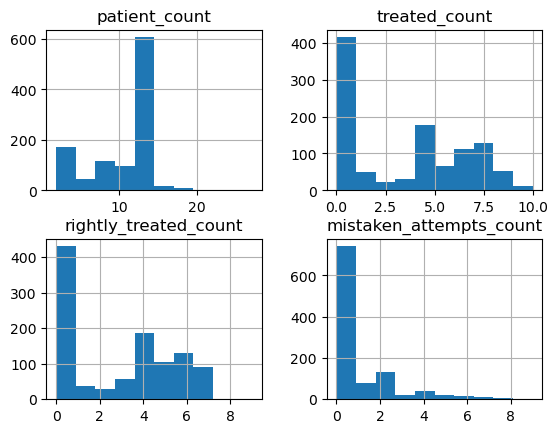

In [11]:

# Visualize histograms of all the distributions
columns_list = ['patient_count', 'treated_count', 'rightly_treated_count', 'mistaken_attempts_count']
rightly_treated_count_df[columns_list].hist();



## Did they do it in the right order?

(Red, Gray, Black), then wavers, then walkers last

In [12]:

# Investigate the presence of black
srs = frvrs_logs_df.applymap(lambda x: 'black' in str(x).lower(), na_action='ignore').sum()
columns_list = srs[srs != 0].index.tolist()
columns_list

['voice_capture_message', 'voice_command_command_description', 'tag_selected_type', 'tag_applied_type', 'tag_discarded_type']

In [13]:

# Investigate the presence of wave
srs = frvrs_logs_df.applymap(lambda x: 'wave' in str(x).lower(), na_action='ignore').sum()
columns_list = srs[srs != 0].index.tolist()
columns_list

['action_type', 'patient_demoted_sort', 'voice_capture_message', 'voice_command_message', 'voice_command_command_description', 'patient_record_sort', 's_a_l_t_wave_if_can_sort_command_text', 's_a_l_t_waved_sort_command_text', 'patient_engaged_sort']


#### Edge cases

The worst-case scenario is displayed as the blue vertical bar at the far left of the histogram. The best-case scenario is a component of the right-most vertical bar.

In [17]:

# Display a sample of adjusted R-squared at its maximum, dropping columns with all NaN values and transposing it
max_rsquared_adj = engagement_sort_df.rsquared_adj.max()
mask_series = engagement_sort_df.rsquared_adj.isin([max_rsquared_adj])
df = engagement_sort_df[mask_series]
display(df.sample(min(4, df[mask_series].shape[0])).dropna(axis='columns', how='all').T)

277  \
logger_version                                          1.3   
session_uuid           37ed31fb-6f8a-4cc0-b80e-ac4138e42405   
scene_id                                                2   
last_threat_engaged                               1005491.0   
last_walker_engaged                               1005491.0   
rsquared_adj                                            1.0   
last_still_engaged                                 530803.0   
last_waver_engaged                                 778433.0   
stills_finished_first                                  True   

                                                        522  \
logger_version                                          1.0   
session_uuid           741e494b-63ff-4ea2-ad88-657f2276045d   
scene_id                                                1   
last_threat_engaged                                271506.0   
last_walker_engaged                                272859.0   
rsquared_adj                                            1.0   
last_still_engaged                                  89570.0   
last_waver_engaged                                 108946.0   
stills_finished_first                                  True   

                                                        785  \
logger_version                                          1.3   
session_uuid           b5a82a5b-e259-4d87-bdb7-94f9cb1ce6ea   
scene_id                                                1   
last_threat_engaged                                279352.0   
last_walker_engaged                                283207.0   
rsquared_adj                                            1.0   
last_still_engaged                                  48755.0   
last_waver_engaged                                 124270.0   
stills_finished_first                                  True   

                                                        402  
logger_version                                          1.0  
session_uuid           5dce5abe-7ded-46e7-8d07-b2e2cd76ef55  
scene_id                                                1  
last_threat_engaged                                143073.0  
last_walker_engaged                                157464.0  
rsquared_adj                                            1.0  
last_still_engaged                                  58727.0  
last_waver_engaged                                 116633.0  
stills_finished_first                                  True

In [18]:

# Display a sample of adjusted R-squared at its minimum, dropping columns with all NaN values and transposing it
min_rsquared_adj = engagement_sort_df.rsquared_adj.min()
mask_series = engagement_sort_df.rsquared_adj.isin([min_rsquared_adj])
df = engagement_sort_df[mask_series]
display(df.sample(min(4, df[mask_series].shape[0])).dropna(axis='columns', how='all').T)

65
logger_version                                          1.0
session_uuid           0b891add-e0c3-463d-948d-7f491f1d10ef
scene_id                                                4
last_threat_engaged                                676501.0
last_walker_engaged                                653151.0
rsquared_adj                                           -0.5
last_still_engaged                                 676501.0
last_waver_engaged                                 722393.0
stills_finished_first                                 False

In [19]:

# In the worse-case scenario, the responder was supposed to engage the waver first, then the two walkers
# Instead, they engaged one of the walkers, then a waver, then the other walker
session_uuid = '274ce308-c366-4829-b9cc-d535b51d16d3'
scene_id = 1
engaged_sort_dict = {'walker': [54614, 102065], 'waver': [88520]}
ideal_sequence = []
for sort in ['still', 'waver', 'walker']: ideal_sequence.extend(engaged_sort_dict.get(sort, []))
ideal_sequence = Series(data=ideal_sequence)
actual_sequence = ideal_sequence.sort_values(ascending=True)
print(f'ideal_sequence = {ideal_sequence.tolist()}\nactual_sequence = {actual_sequence.tolist()}')
X, y = ideal_sequence.values.reshape(-1, 1), actual_sequence.values.reshape(-1, 1)
X1 = sm.add_constant(X)
try: rsquared_adj = sm.OLS(y, X1).fit().rsquared_adj
except: rsquared_adj = nan
print(f'rsquared_adj = {rsquared_adj}')

ideal_sequence = [88520, 54614, 102065]
actual_sequence = [54614, 88520, 102065]
rsquared_adj = -0.9971283921806686


In [20]:

# In the best-case scenario, the responder was supposed to engage the still first, then the waver, then the walkers
# They executed this in the correct sequence
session_uuid = '7de52180-d823-4f9e-9003-aeab8139970b'
scene_id = 1
engaged_sort_dict = {'still': [56434], 'walker': [164294, 195562, 208187, 210397, 211747, 212450, 212649], 'waver': [108854]}
ideal_sequence = []
for sort in ['still', 'waver', 'walker']: ideal_sequence.extend(engaged_sort_dict.get(sort, []))
ideal_sequence = Series(data=ideal_sequence)
actual_sequence = ideal_sequence.sort_values(ascending=True)
print(f'ideal_sequence = {ideal_sequence.tolist()}\nactual_sequence = {actual_sequence.tolist()}')
X, y = ideal_sequence.values.reshape(-1, 1), actual_sequence.values.reshape(-1, 1)
X1 = sm.add_constant(X)
try: rsquared_adj = sm.OLS(y, X1).fit().rsquared_adj
except: rsquared_adj = nan
print(f'rsquared_adj = {rsquared_adj}')

ideal_sequence = [56434, 108854, 164294, 195562, 208187, 210397, 211747, 212450, 212649]
actual_sequence = [56434, 108854, 164294, 195562, 208187, 210397, 211747, 212450, 212649]
rsquared_adj = 1.0



### Stills Finished First

In [21]:

# Verify that the stills were finished first
f = lambda df: df.last_still_engaged == min(df.last_still_engaged, df.last_walker_engaged, df.last_waver_engaged)
engagement_sort_df['stills_finished_first'] = engagement_sort_df.apply(f, axis='columns')

# Create a mask where any of the last engaged columns are NaN and set the stills finished first column to NaN if true
columns_list = ['last_still_engaged', 'last_walker_engaged', 'last_waver_engaged']
mask_series = engagement_sort_df[columns_list].isnull().any(axis='columns')
engagement_sort_df.loc[mask_series, 'stills_finished_first'] = nan

mask_series = (engagement_sort_df.stills_finished_first == False)
df = engagement_sort_df[mask_series]
display(df.sample(min(4, df[mask_series].shape[0])).dropna(axis='columns', how='all').T)

862  \
logger_version                                          1.0   
session_uuid           cf953248-e6cf-4544-95ce-4843d0f56f10   
scene_id                                                2   
last_threat_engaged                                822747.0   
last_walker_engaged                                770516.0   
rsquared_adj                                       0.516312   
last_still_engaged                                 822747.0   
last_waver_engaged                                 835218.0   
stills_finished_first                                 False   

                                                        731  \
logger_version                                          1.0   
session_uuid           ab1f8cd1-8d65-45da-b087-89b25ff46c66   
scene_id                                                1   
last_threat_engaged                                748245.0   
last_walker_engaged                                613587.0   
rsquared_adj                                       0.058678   
last_still_engaged                                 748245.0   
last_waver_engaged                                 735900.0   
stills_finished_first                                 False   

                                                        466  \
logger_version                                          1.0   
session_uuid           693461dd-b8f6-4c60-92b6-bd1db0ffcac8   
scene_id                                                1   
last_threat_engaged                                447319.0   
last_walker_engaged                                392835.0   
rsquared_adj                                       0.180085   
last_still_engaged                                 447319.0   
last_waver_engaged                                 301317.0   
stills_finished_first                                 False   

                                                        783  
logger_version                                          1.3  
session_uuid           b541f5c9-93fe-4ef3-9fe7-38493b8aa8a8  
scene_id                                                2  
last_threat_engaged                                712932.0  
last_walker_engaged                                681491.0  
rsquared_adj                                       0.446786  
last_still_engaged                                 712932.0  
last_waver_engaged                                 570074.0  
stills_finished_first                                 False

In [25]:

cn = 'voice_capture_message'
mask_series = frvrs_logs_df[cn].isnull()
# sorted([vc for vc in frvrs_logs_df[~mask_series][cn]], key=lambda x: len(x))[-10:]
srs = frvrs_logs_df[~mask_series][cn].value_counts()
mask_series = srs.index.map(lambda x: len(x) > 25)
srs[mask_series].head(10)

are you hurt anywhere else                     16
do you have any other injuries                 13
if you can hear me wave your hand               9
are you hurting anywhere else                   7
anybody that can wave wave                      6
have you heard anywhere else                    5
sir can you tell me your name                   5
if you can hear my voice I want you to wave     4
if you can hear my voice wave                   4
are you injured anywhere else                   4
Name: voice_capture_message, dtype: int64